# **Problem Statement :**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



In [ ]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the dataset
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#Shape of the data 
df.shape

(7787, 12)

In [ ]:
# Basic info about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# Statistical info.
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


***Points to be noted:*** 📝

* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.




***First replace few null values.*** 

In [ ]:
# Number of null values in date_added.
df.date_added.isnull().sum()

10

In [ ]:
# Remove null values in date_added.
df.dropna(subset=['date_added'], inplace=True)

In [ ]:
# Number of null values in rating.
df.rating.isnull().sum()

7

In [ ]:
# Remove null values in rating.
df.dropna(subset=['rating'], inplace=True)

In [ ]:
df.shape

(7770, 12)

In [ ]:
# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

# **Exploratory Data Analysis**

**Types of content of Netflix..!**

In [ ]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [ ]:
# Create a pie chart for Type.
labels = ['Movies', 'TV Show']
px.pie(df ,values = df['type'].value_counts(), names = labels, 
          title='Type of content watched on Netflix' , hole= 0.45 )

***69.1% of the content available on Netflix are movies; the remaining 30.9% are TV Shows.***

In [ ]:
TV = df[df['type'] == 'TV Show']
Movie = df[df['type'] == 'Movie']
col = 'year_added'

In [ ]:
tv_show = TV[col].value_counts().reset_index()
tv_show = tv_show.rename(columns = {col : 'count', 'index': col})
tv_show = tv_show.sort_values(col)

movie = Movie[col].value_counts().reset_index()
movie = movie.rename(columns = {col : 'count', 'index': col})
movie = movie.sort_values(col)

In [ ]:
labels = ['TV Shows', 'Movies']

In [ ]:
tv_show

,year_added,count
9,2008,1
8,2013,5
7,2014,6
5,2015,30
4,2016,184
3,2017,361
2,2018,429
1,2019,656
0,2020,697
6,2021,29


Text(0.5, 1.0, 'Content added over the year')

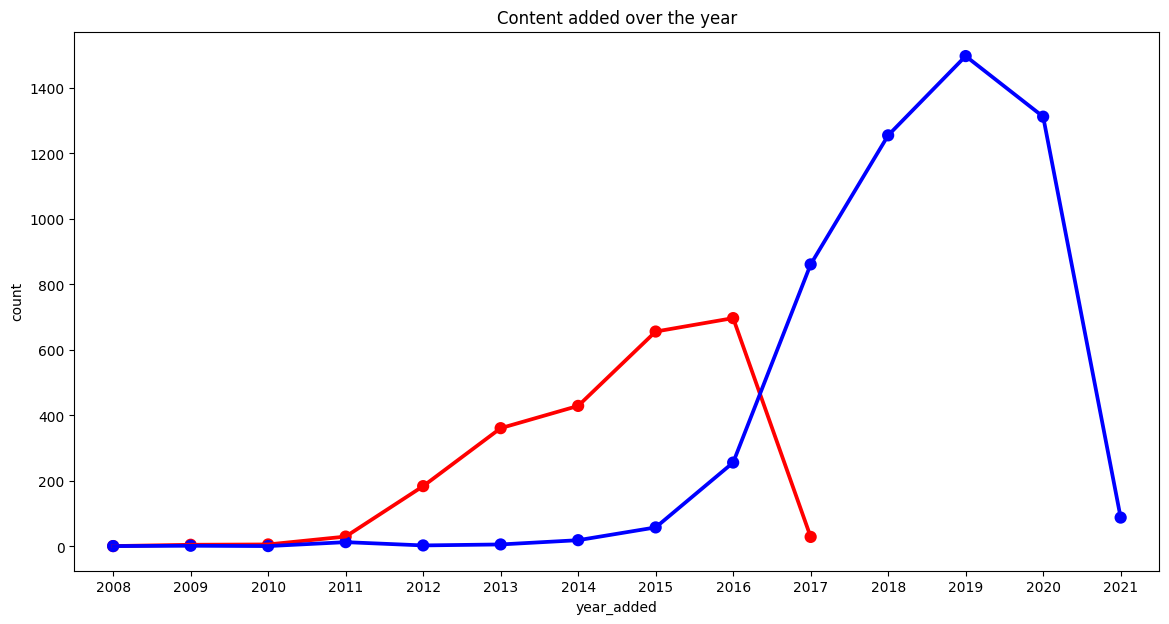

In [ ]:
# Plot growth of the contents over the years.
plt.figure(figsize= (14,7))
sns.pointplot(x = tv_show['year_added'] , y = tv_show['count'], color= 'red')
sns.pointplot(x = movie['year_added'] , y = movie['count'], color= 'blue')
plt.title('Content added over the year')

In [ ]:
# Check why does it suddenly drop in 2021.
len(df[df['year_added'] == 2021])

117

* ***Growth in the number of movies on Netflix is much higher than tv shows.***
* ***From 2015 we can see a noticeable addition in the number of movies and tv shows uploaded by Netflix on its platform.***
* ***The highest number of movies  got added in 2019 and 2020.***
* ***The line plot shows very few movies, and tv shows got added in 2021. It is due to very little data collected from the year 2021.***

### **In which month do most movies and tv shows get added..?**

In [ ]:
# Create dataframe to store manth values and counts.
month_df = pd.DataFrame(df['month_added'].value_counts()).reset_index()
month_df.rename(columns= {'index' : 'Month', 'month_added': 'count'}, inplace=True)
month_df = month_df.sort_values('Month')

In [ ]:
px.bar(month_df, x = 'Month', y = 'count', text_auto= True,height=500 , width=800,
            title = 'Addition of Tv shows & Movies on monthly basis')

* ***Most of the content is uploaded either by year ending or beginning.***
* ***October, November, December, and January are months in which many shows and movies get uploaded to the platform.***
* ***It might be due to the winter, as in these months people may stay at home and watch shows and movies in their free time.***

## **Country**

In [ ]:
# Lets find the top ten countries that produce most of the content.
country_df =  pd.DataFrame(df['country'].value_counts().head(10)).reset_index().rename(columns={'index' : 'Country', 'country': 'count'}).sort_values('count', ascending=False)

In [ ]:
country_df

,Country,count
0,United States,2546
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
5,Canada,177
6,Spain,134
7,France,115
8,Egypt,101
9,Turkey,100


Text(0.5, 1.0, 'Top 10 most countries with the most content')

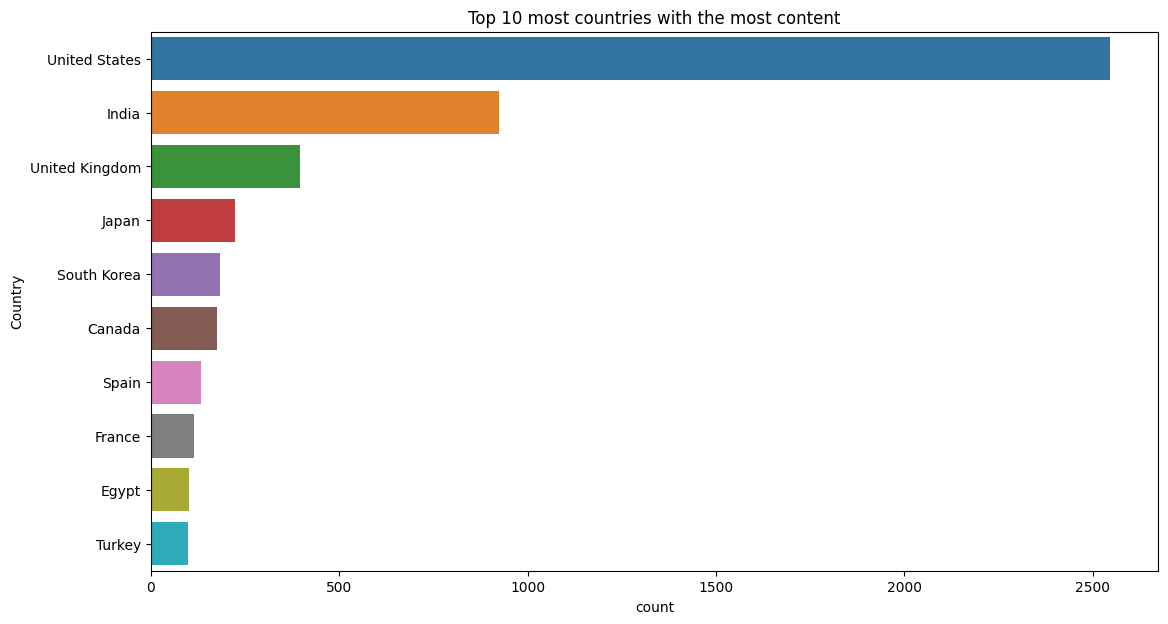

In [ ]:
#ploting the barplot for the top 10 countries with the most content

plt.figure(figsize=(13,7))
sns.barplot(data = country_df , x= 'count', y= 'Country' )
plt.title('Top 10 most countries with the most content')

* ***The majority of the content providers are in the above top-ten countries.***
* ***Among which USA, India, and Uk create more than half of the tv shows and movies on the platform.***

## **Release_year:**

In [ ]:
#Release Year 
#Put the data in bins
release_year_bins = pd.DataFrame(pd.cut(df['release_year'],[1942,1999,2010,2021]).value_counts()).reset_index()
release_year_bins.rename(columns = {'index' : 'year_interval', 'release_year' : 'count'}, inplace=True)

In [ ]:
release_year_bins

,year_interval,count
0,"(2010, 2021]",6425
1,"(1999, 2010]",896
2,"(1942, 1999]",446


In [ ]:
# Plot it.
px.pie(release_year_bins ,values = 'count' , 
          title='Release year of  content' , hole= 0.45 )

* ***82% of the content available was released between 2010 and 2021.***
* ***17.28% of the content available was released before 2010.***

# **Director**

In [ ]:
# Replace the null values in director.
df['director']=df['director'].fillna('')

In [ ]:
# Not taking the null directors
director_df = pd.DataFrame(df['director'].value_counts().head(15)).reset_index().rename(columns={'index' : 'Director', 'director': 'count'}).sort_values('count', ascending=False)[1:]

In [ ]:
director_df

,Director,count
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Martin Scorsese,12
6,Youssef Chahine,12
7,Jay Chapman,12
8,Steven Spielberg,10
9,David Dhawan,9
10,Robert Rodriguez,8


([<matplotlib.axis.YTick at 0x7f8a66c65e50>,
 [Text(0, 0, '0'),
  Text(0, 2, '2'),
  Text(0, 5, '5'),
  Text(0, 8, '8'),
  Text(0, 10, '10'),
  Text(0, 12, '12'),
  Text(0, 15, '15'),
  Text(0, 18, '18'),
  Text(0, 20, '20')])

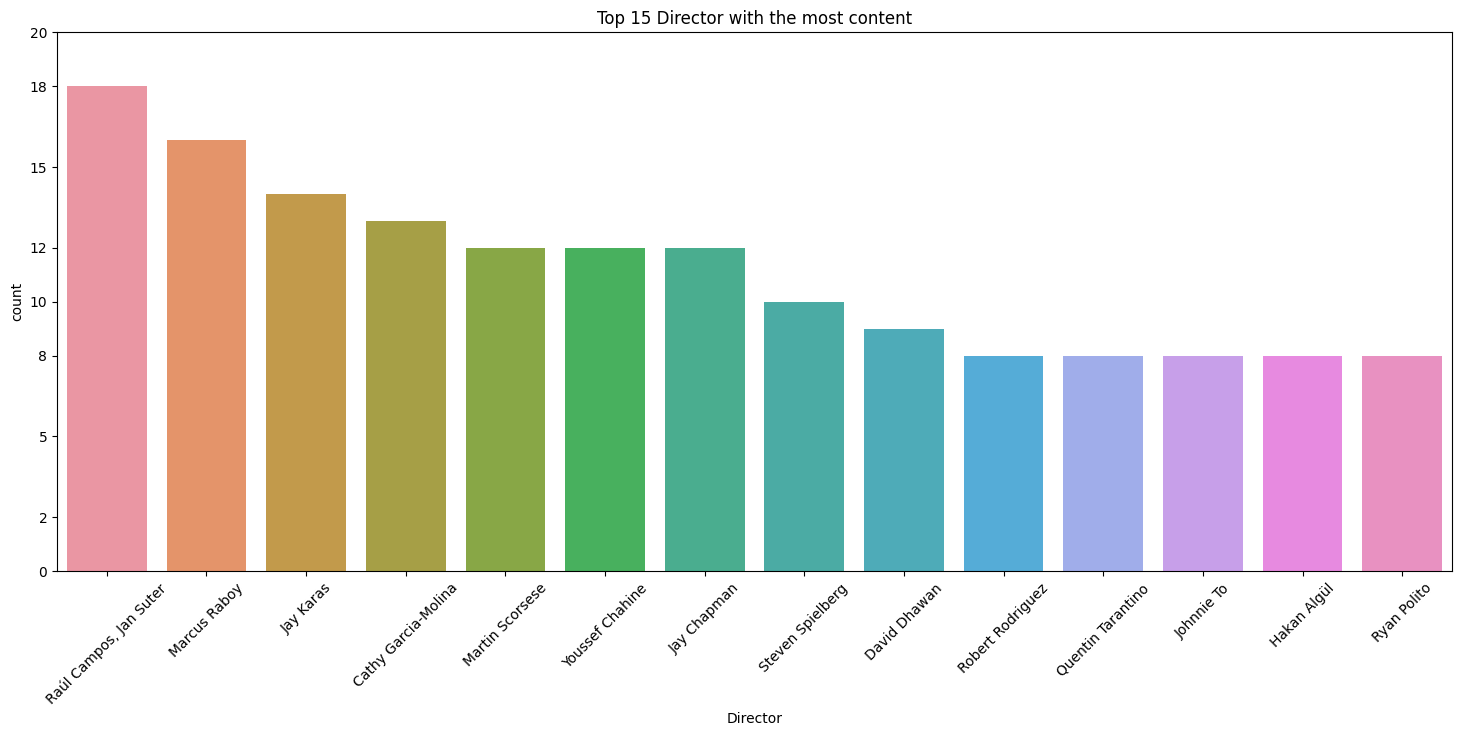

In [ ]:
plt.figure(figsize=(18,7))
ax = sns.barplot( data= director_df ,x = 'Director', y =  'count' )
plt.title('Top 15 Director with the most content')
plt.xticks(rotation = 45)
plt.yticks(list(round(x) for x in ax.get_yticks()))

# Cast

In [ ]:
# Create a list of all the actors in the data.
def cast_to_list(data):
    actor_list = {}
    other_list = []
    cast_list = list(data['cast'])
    for i in range(len(cast_list)):
        other_list.extend(str(cast_list[i]).split(','))
    for i in other_list:
        if i not in actor_list:
            actor_list[i] = other_list.count(i)
    return actor_list

In [ ]:
# Create dataframe for list of actors.
 # dropped the nan values in the dataframe which was present at 106th index.
actor_list = pd.DataFrame([cast_to_list(df)]).T.reset_index().sort_values(0, ascending = False).drop(106)

In [ ]:
actor_list.head(10)

,index,0
1294,Anupam Kher,38
194,Takahiro Sakurai,28
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25
2506,Paresh Rawal,24
8462,Andrea Libman,24
4368,Yuki Kaji,23
4994,Vincent Tong,22
2201,Akshay Kumar,22


In [ ]:
actor_list.rename(columns= {'index': 'actor', 0: 'count'},inplace=True)

([<matplotlib.axis.YTick at 0x7f8a66c4e910>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20'),
  Text(0, 25, '25'),
  Text(0, 30, '30'),
  Text(0, 35, '35'),
  Text(0, 40, '40')])

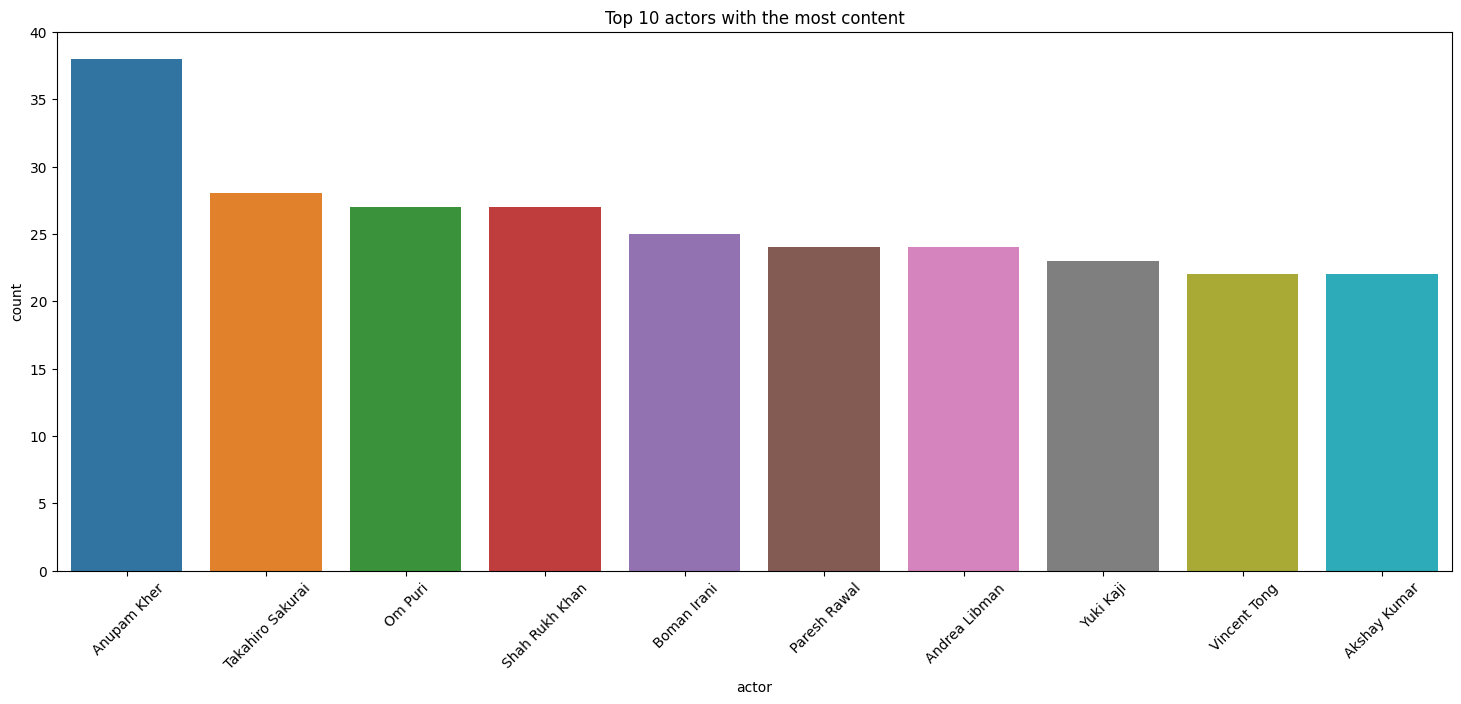

In [ ]:
plt.figure(figsize=(18,7))
ax = sns.barplot(data= actor_list.head(10) , x = 'actor', y= 'count')
plt.title('Top 10 actors with the most content')
plt.xticks(rotation = 45)
plt.yticks(list(round(x) for x in ax.get_yticks()))

* ***Happy to see 6 of the actors in the top ten list of most numbers tv shows and movies are from India.***

In [ ]:
# Replace the null values in cast.
df['cast']=df['cast'].fillna('')

## **Content & Country:**

### **What kind of content is available in different countries in recent years..?**

In [ ]:
df['country_name'] = (df['country'].str.split(',').str[0])
order =df['country_name'].value_counts()[:10].index

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,country_name
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12,Mexico


In [ ]:
''' Since there are many countries, we will take the top ten countries that produce
     content and see what type of content these countries provide the most?'''
country_wise_content = df[['type', 'country_name']].groupby(df['country_name'])['type'].value_counts().unstack().loc[order].reset_index()

In [ ]:
# Plot the above data. Top 10 movies producing countries..!
px.bar(country_wise_content, x = 'index', y = 'Movie', text_auto= True,height=500 , width=900,
            title = 'Top 10  Movies producing countries')

In [ ]:
# Plot the above data. Top 10 TV Shows producing countries..!
px.bar(country_wise_content, x = 'index', y = 'TV Show', text_auto= True,height=500 , width=900,
            title = 'Top 10  TV Shows producing countries')

* ***The United States is a leading producer of both types of content; this makes sense since Netflix is a US company.***

* ***The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.***

* ***On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.***


# **Genre**

In [ ]:
#Create a subset of the data for genre..!!
genre = df[['country', 'listed_in']]

In [ ]:
# Create a function to seperate all genres and store counts for each
def country_wise_genre(country):   
    country_genre = genre[genre['country'] == country]
    country_genre = ",".join(country_genre['listed_in']).split(',')
    country_genre_dict = dict(Counter(country_genre))
    return country_genre_dict

In [ ]:
# Define list of top ten countries.
country_list = list(country_wise_content['index'])
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}

# Iterate through all values in country_list.
for i in country_list:
    genre_data = country_wise_genre(i)
    country_wise_genre_dict[i] = genre_data
    df_country_genre = pd.DataFrame(country_wise_genre_dict).reset_index()
    df_country_genre.rename({'index': 'Genre'}, inplace= True, axis  =1 )

In [ ]:
pd.DataFrame((country_wise_genre_dict))

,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Australia
Action & Adventure,196.0,124.0,19.0,12.0,42.0,12.0,13.0,3.0,2.0,3.0
Independent Movies,274.0,128.0,22.0,15.0,NaN,8.0,NaN,10.0,12.0,4.0
Sci-Fi & Fantasy,96.0,10.0,4.0,5.0,7.0,1.0,3.0,2.0,2.0,2.0
Dramas,333.0,365.0,25.0,19.0,8.0,19.0,10.0,27.0,14.0,6.0
Thrillers,134.0,85.0,13.0,9.0,1.0,3.0,12.0,17.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
Sports Movies,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Classic & Cult TV,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TV Sci-Fi & Fantasy,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
LGBTQ Movies,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


# **Year added vs Type of content :**

**Hypothesis Testing to check is there is any relation between year_added and type:**

* ***Null Hypothesis:*** *year_added has no impact on type of content that gets added to the platform.*
* ***Alternative Hypothesis:*** *year_added has impact on type of content that gets added to the platform.*

***Set significance level to 0.05.***

In [ ]:
hypo_test = pd.crosstab(df['type'], df['year_added'], margins=False)
hypo_test

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,
Movie,1,2,1,13,3,6,19,58,256,861,1255,1497,1312,88
TV Show,1,0,0,0,0,5,6,30,184,361,429,656,697,29


In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_test)

p

7.478336952750899e-11

***The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis.***


* ***From the EDA we did in the beginning, we saw that there are more Movies than Tv Shows on Netflix, which might be enough to assume that Netflix focuses more on Movies than Tv Shows. But the data proves this assumption wrong.***

* ***The above line plot shows that Netflix has been adding many International Tv Shows, Tv Dramas, Tv Comedy Shows and many more tv shows in the recent years compared to Movies.***

* ***From this observation, we can say that Netflix might be shifting slowly towards Tv Shows.***

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,country_name
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12,Singapore


## **Duration:** 

In [ ]:
# Create subsets for tv shows and movies.
TV = df[df['type'] == 'TV Show']
Movie = df[df['type'] == 'Movie']

# Select the durations for both.
tv_show_duration = TV['duration'].reset_index()
movie_duration = Movie['duration'].reset_index()

# Remove string values from movies & tv shows duration.
tv_show_duration.duration = tv_show_duration.duration.str.split(' ').str[0].astype('int')
movie_duration.duration = movie_duration['duration'].str.split(' ').str[0].astype('int')

Text(0.5, 1.0, 'Duration of TV Shows')

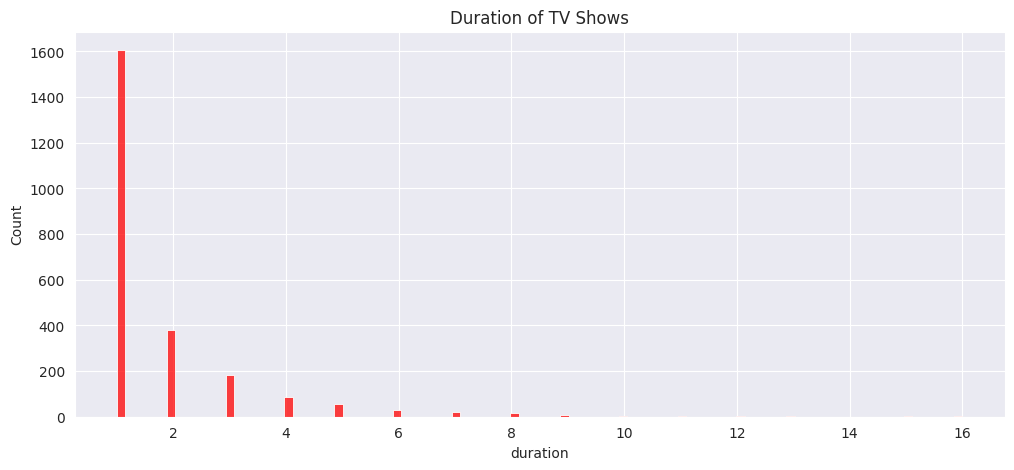

In [ ]:
plt.figure(figsize = (12,5))
sns.set_style('darkgrid')
sns.histplot(data = tv_show_duration['duration'], color= 'red')
plt.title('Duration of TV Shows')

* ***Most of the Tv Shows last for 1 or 2 seasons, it is rare for a show to have more than 5 seasons.***

Text(0.5, 1.0, 'Duration of Movies')

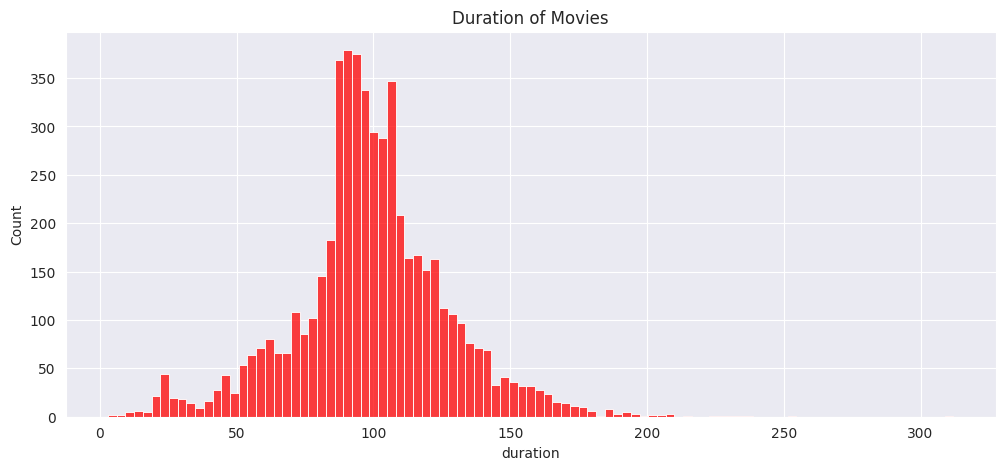

In [ ]:
plt.figure(figsize = (12,5))
sns.set_style('darkgrid')
sns.histplot(data = movie_duration['duration'], color= 'red')
plt.title('Duration of Movies')

* ***Most of the movies last for 90 to 120 minutes.***

# **Rating**

In [ ]:
#Creating a subset for ratings..
tv_show_rating = TV['rating'].value_counts()
movie_rating = Movie['rating'].value_counts()

tv_show_rating = tv_show_rating.reset_index().rename(columns= {'index': 'rating', 'rating':'count'})
movie_rating = movie_rating.reset_index().rename(columns= {'index': 'rating', 'rating': 'count'})

Text(0.5, 1.0, 'Ratings')

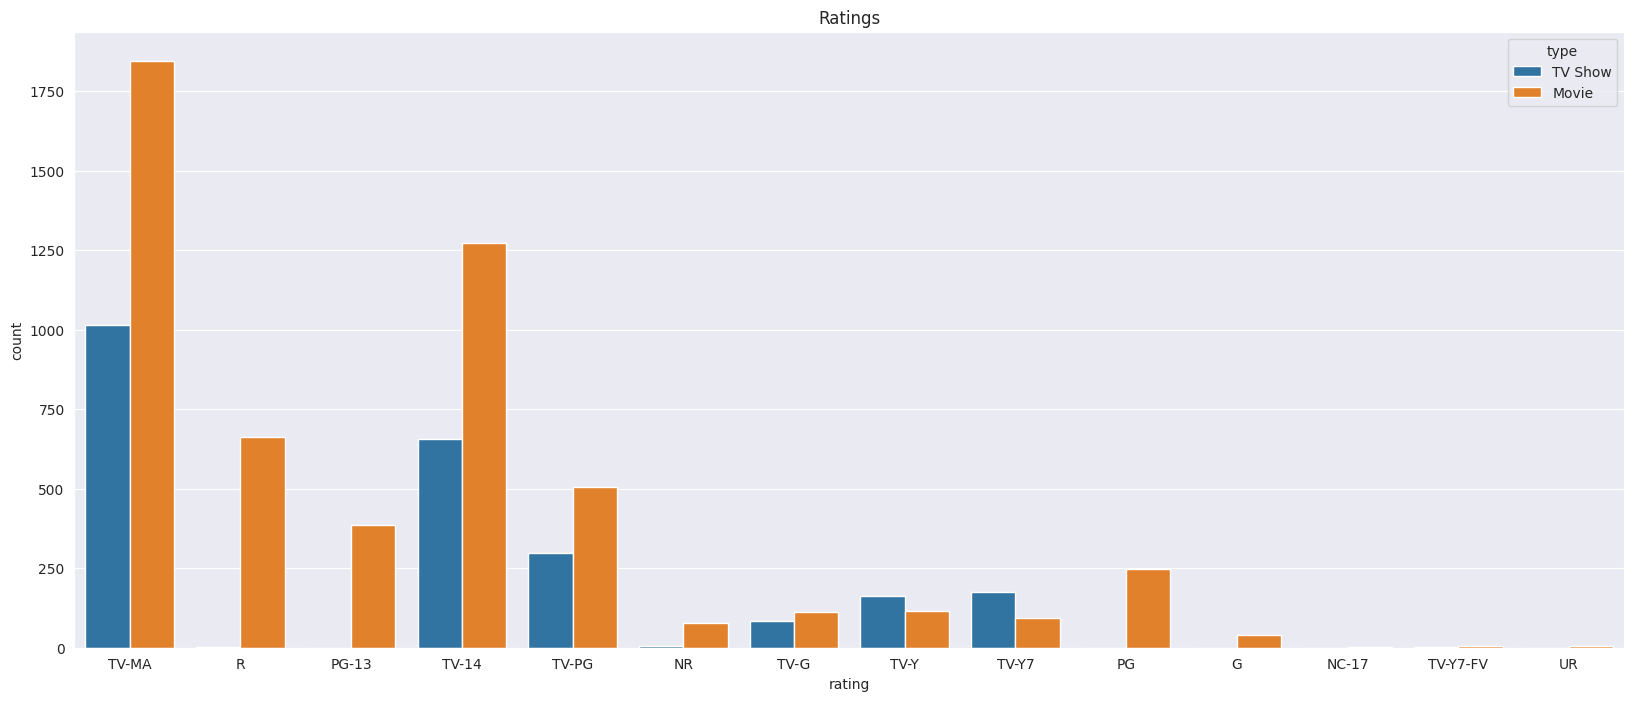

In [ ]:
# Plot the count of ratings for Tv shows and movies.
plt.figure(figsize = (20,8))
sns.countplot(data = df, x = df['rating'], hue = 'type')
plt.title('Ratings')

* ***TV-MA tops the charts, indicating that mature content is more popular on Netflix.***
* ***This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids. & Movies with rating R are also popular***
* ***Very few titles with ratings of  NC-17, TV-Y7-FV & UR  exist.***

# **Data Pre-processing**

### **We will be using text columns to create clusters for our data.**

In [ ]:
cluster_df = df[['title']]

cluster_df['data_clusters'] = (df['description'] + ' ' + df['listed_in'] + ' ' +  df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating'].astype(str))
cluster_df.set_index('title' , inplace= True)

cluster_df.head()

,data_clusters
title,
3%,NaN
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


In [ ]:
def remove_punctuation(text):
    import string
    if isinstance(text, str):
        translator = str.maketrans('', '', string.punctuation)
        return text.translate(translator)
    else:
        return text

In [ ]:
#Applying the function to our dataset
cluster_df['cluster_data'] = cluster_df['data_clusters'].apply(remove_punctuation)
cluster_df.drop('data_clusters', axis = 1 , inplace = True)
cluster_df.head(3)

,cluster_data
title,
3%,NaN
7:19,After a devastating earthquake hits Mexico Cit...
23:59,When an army recruit is found dead his fellow ...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
#Function to remove the stopwords
def stopwords(text):
    if isinstance(text, str):
        text = [word.lower() for word in text.split() if word.lower() not in stop_words]
        return " ".join(text)
    else:
        return text

In [ ]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head()

title
3%                                                     NaN
7:19     devastating earthquake hits mexico city trappe...
23:59    army recruit found dead fellow soldiers forced...
9        postapocalyptic world ragdoll robots hide fear...
21       brilliant group students become cardcounting e...
Name: cluster_data, dtype: object

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    if isinstance(text,str):
      text = [stemmer.stem(word) for word in text.split()]
      return " ".join(text) 
    else:
      return text

In [ ]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

,cluster_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,devast earthquak hit mexico citi trap survivor...


In [ ]:
words = cluster_df['cluster_data']

**Creating the clusters :**

In [ ]:
words.dropna(inplace = True)

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(words)

In [ ]:
print(X.shape)

(5189, 20000)


In [ ]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'ştar', 'şükran', 'şükrü'], dtype=object)

### **Performing Dimensionality Reduction:** 

In [ ]:
pca = PCA()
pca.fit(X.toarray())

PCA()

Text(0, 0.5, 'cumulative explained variance')

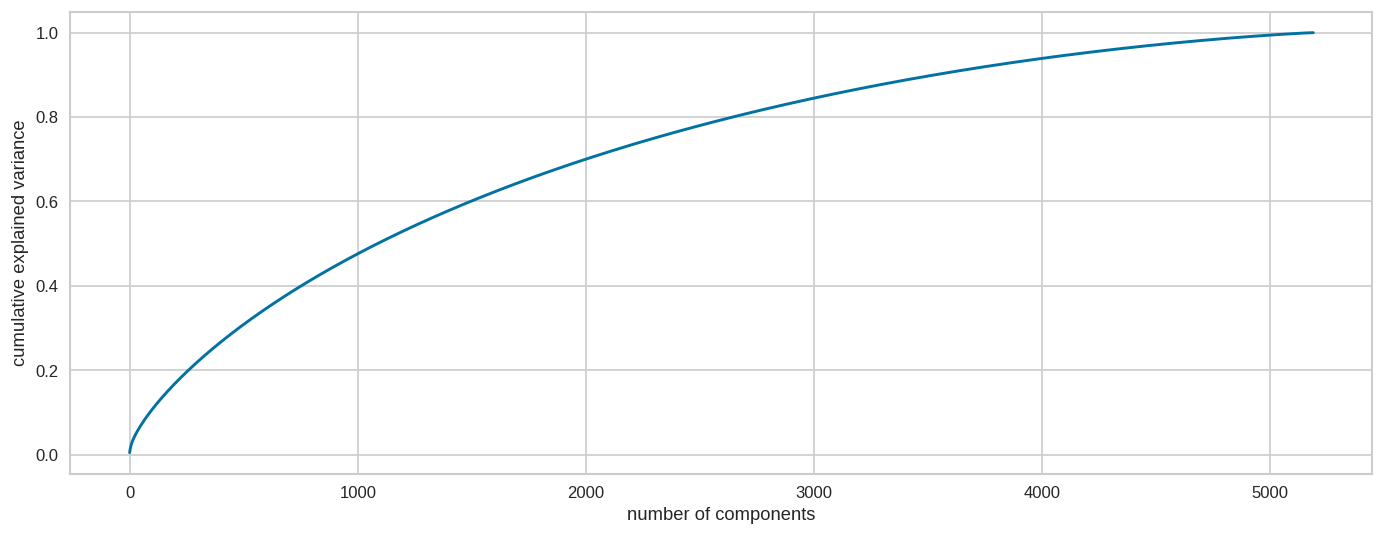

In [ ]:
# plot to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* ***We can see from the above plot almost 95% of the variance can be explained by 5000 components.***
* ***Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.***

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(5189, 4155)

In [ ]:
X_transformed

array([[ 1.36349659e-01,  1.71776241e-02, -2.05010794e-02, ...,
        -9.75641495e-03,  2.13802575e-04,  5.22536312e-04],
       [-3.48550155e-02,  3.76143179e-02, -3.20898346e-03, ...,
        -1.11922838e-02,  2.86051805e-03,  3.57066227e-03],
       [-4.04225757e-02,  4.01151624e-02, -3.76992266e-02, ...,
         1.74290399e-02,  3.58821055e-03, -9.89159858e-04],
       ...,
       [-3.52623719e-02,  2.73222590e-03, -7.49202709e-03, ...,
        -2.23342589e-04,  9.68100381e-05, -7.05922698e-06],
       [ 1.08672003e-01, -2.95968067e-03,  1.58628639e-02, ...,
        -5.31897725e-03, -2.70095840e-03, -4.92320785e-03],
       [-8.45573732e-02, -1.96560979e-01,  3.64244123e-01, ...,
         6.35473863e-03, -3.73021525e-03, -2.15870382e-03]])

**Now lets find the optimal values for k using Silhouette**

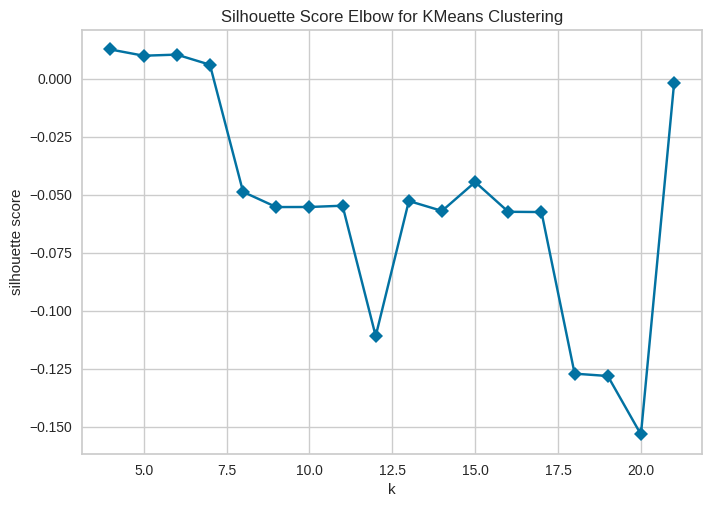

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.022422372301767454


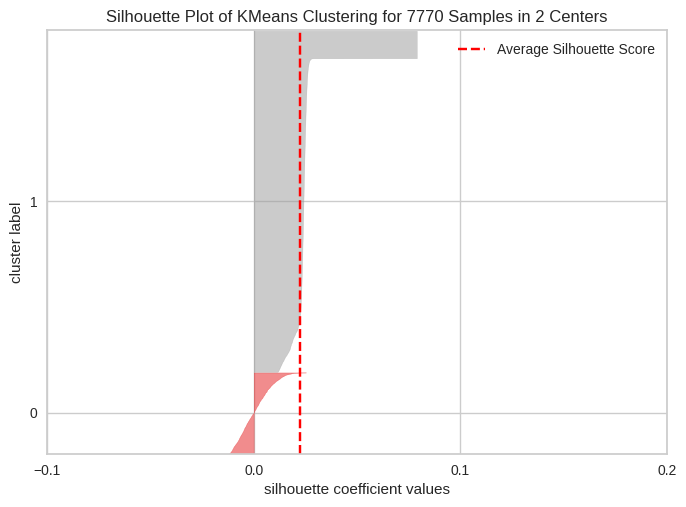

For n_clusters = 3, silhouette score is 0.014331305471786328


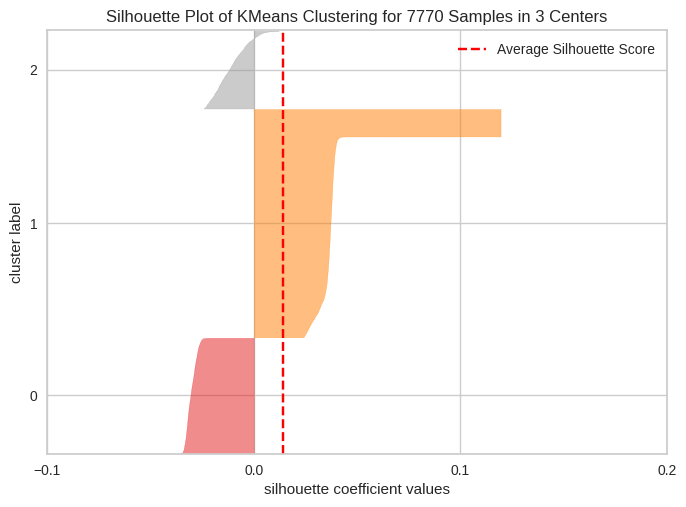

For n_clusters = 4, silhouette score is 0.012618385738273284


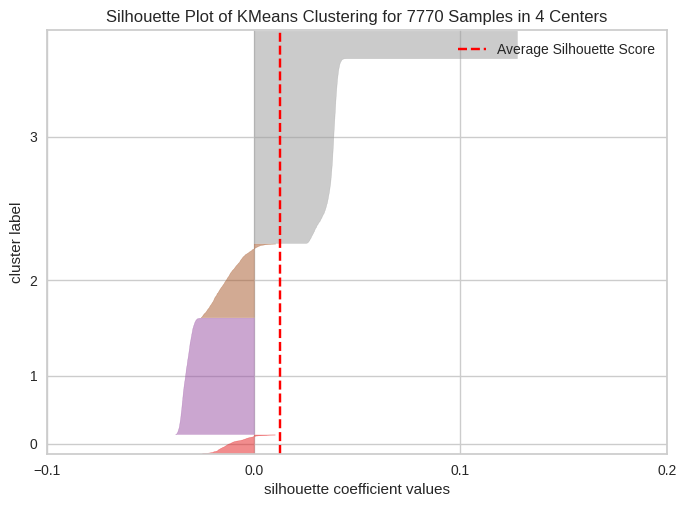

For n_clusters = 5, silhouette score is 0.009924589544402273


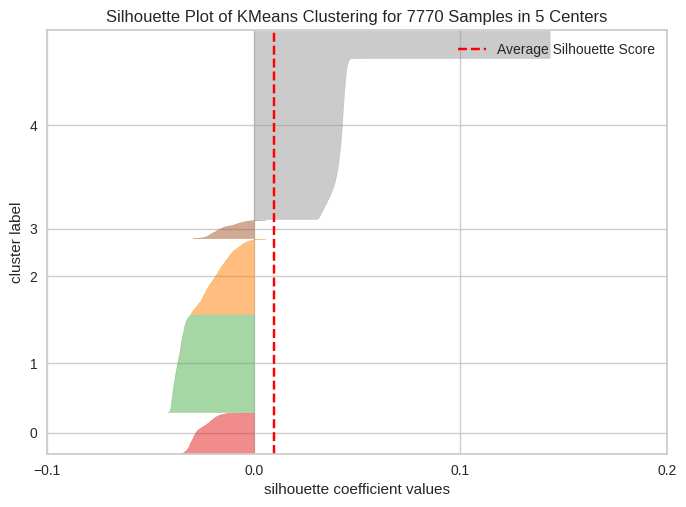

For n_clusters = 6, silhouette score is 0.010401212462941711


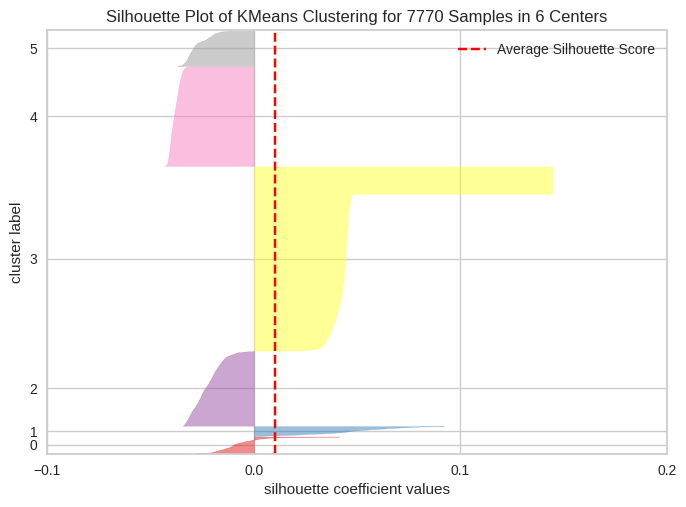

For n_clusters = 7, silhouette score is 0.0060438996568504474


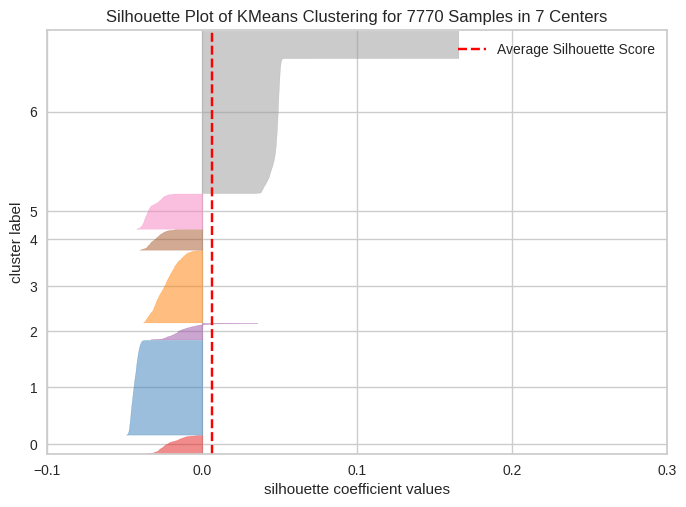

For n_clusters = 8, silhouette score is -0.04876955675305023


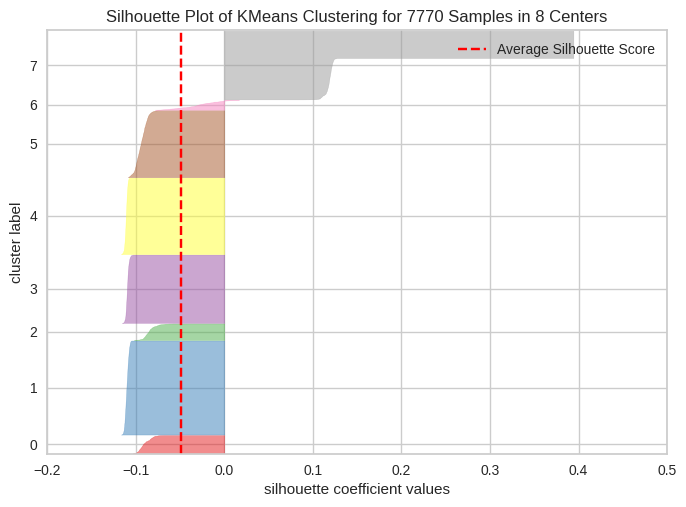

For n_clusters = 9, silhouette score is -0.05531851816168873


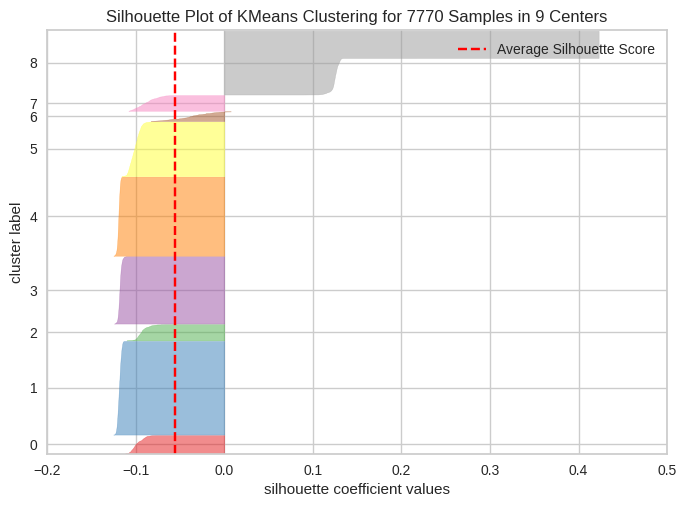

KeyboardInterrupt: ignored

In [ ]:
silhouette_score_analysis(22)

**We will use the Elbow method to find the value of K**

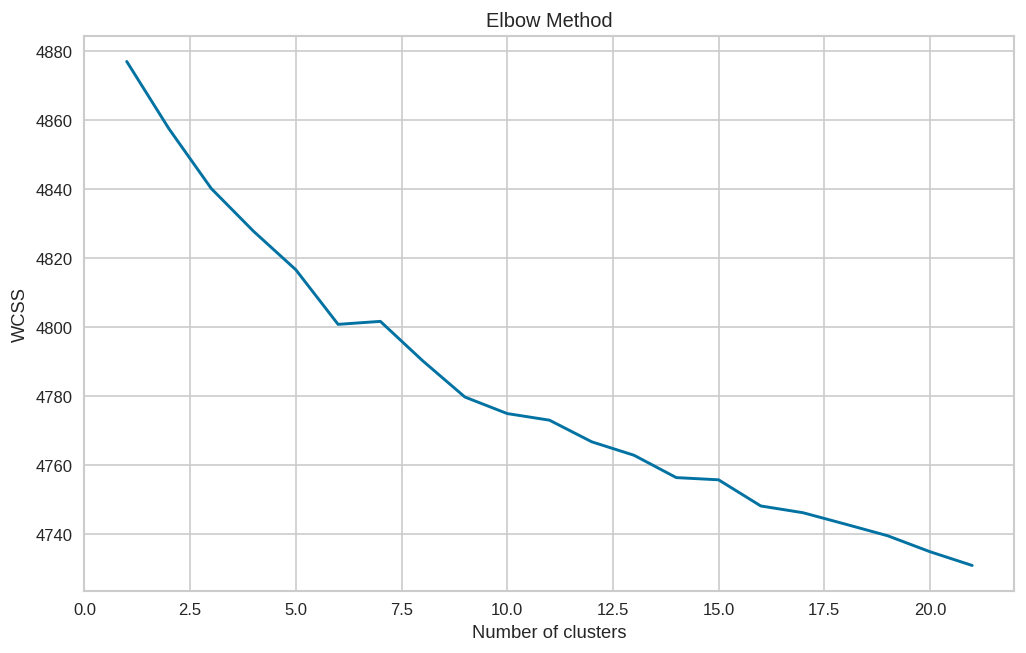

In [ ]:
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**The optimal value for K is 6**

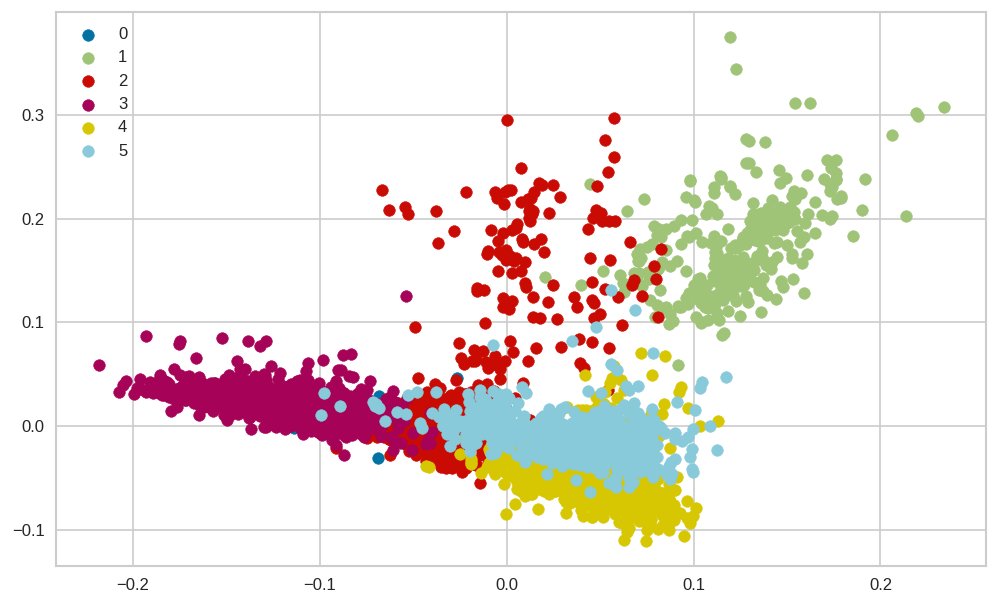

In [ ]:

plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=6, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_

# **Conclusions:**

* ***It was interesting to find that majority of the content available on Netflix is Movies.***
* ***But in the recent years it has been focusing more on Tv-Shows.***
* ***Most of these contents are released either in the year ending or the beginning.***
* ***United States and India are among the top 5 countries that produce all of the available content on the platform.***
* ***Also 6 of the actors among the top ten actors with maximum content are from India.***   
* ***TV-MA tops the charts, indicating that mature content is more popular on Netflix.***
* ***k=6 was found to be an optimal value for clusters using which we grouped our data into 10 distinct clusters.***


## ***Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.*** 